# Analisis del DataSet Adult

## Exportación y Carga del Dataset Adult

In [3]:
import pandas as pd

# URL del dataset en el repositorio de UCI
url = "adult/adult.data"
columnas = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
            "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
            "hours-per-week", "native-country", "income"]
# Leer CSV y limpiar espacios / valores faltantes
df = pd.read_csv(url, names=columnas, na_values="?", skipinitialspace=True)

## Exploración visual de los datos

In [10]:
# Cantidad de filas y columnas del DataFrame
print("Forma del DataFrame:", df.shape)

# Identificar columnas numéricas y categóricas
disc_cols = df.select_dtypes(include=["int64"]).columns.tolist()
cont_cols = df.select_dtypes(include=['float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Columnas cuantitativas discreta:", disc_cols)
print("Columnas cuantitativas continuas:", cont_cols)
print("Columnas categóricas:", cat_cols)

# Ver las primeras filas
df.head()

Forma del DataFrame: (32561, 15)
Columnas cuantitativas discreta: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Columnas cuantitativas continuas: []
Columnas categóricas: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Tratamiento de valores nulos

In [11]:
print("\nConteo de valores faltantes (NaN) por columna:")
df.isnull().sum()


Conteo de valores faltantes (NaN) por columna:


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [13]:
# WorkClass es de tipo Categórico
totalWorkclass = 1836
# Ocuppation es de tipo Categórico
totalOccupation = 1843
# Native Country es de tipo Categórico
totalNativecountry = 583

# En el pero caso se obtienen
print(f"Valores faltantes: {totalWorkclass + totalOccupation + totalNativecountry}")

Valores faltantes: 4262


In [6]:
# Es más del 10% de los datos de entrenamiento, por lo que no se eliminarán filas
# Se usará en cambio la imputación de valores por moda, ya que son variables categóricas

# Columnas categóricas con valores faltantes
cols_con_nan = ['workclass', 'occupation', 'native-country']

print("--- Distribución de Valores Únicos (incluyendo NaN) ---")

for col in cols_con_nan:
    print(f"\nColumna: {col}")
    # Mostrar la frecuencia de cada valor, incluyendo NaN
    print(df[col].value_counts(dropna=False))

--- Distribución de Valores Únicos (incluyendo NaN) ---

Columna: workclass
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Columna: occupation
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
NaN                  1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

Columna: native-country
native-country
United-States                 29170
Mexico                          643
NaN                             583
Philippines                     198
Germany               

In [8]:
print("\n--- Moda Calculada para Imputación ---")
modas = {}

for col in cols_con_nan:
    # La moda es el valor más frecuente. [0] toma el primer valor si hay múltiples modas.
    moda_calculada = df[col].mode()[0]
    modas[col] = moda_calculada
    print(f"Moda de {col}: '{moda_calculada}'")


--- Moda Calculada para Imputación ---
Moda de workclass: 'Private'
Moda de occupation: 'Prof-specialty'
Moda de native-country: 'United-States'


In [9]:
print("\n--- Imputación y Verificación ---")

# Realizar la imputación usando el diccionario 'modas'
for col, moda_val in modas.items():
    # Remplazar los NaN de la columna con su moda
    df[col].fillna(moda_val, inplace=True)
    
# Verificar que ya no queden valores faltantes
print("\nConteo de valores faltantes (NaN) después de la imputación:")
print(df.isnull().sum())


--- Imputación y Verificación ---

Conteo de valores faltantes (NaN) después de la imputación:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipykernel_40005/2543357213.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda_val, inplace=True)


## Transformación de los Datos para K-Means

In [10]:
# Verificar la correspondencia entre education y education-num
# Esto demuestra que education-num es el encoding numérico de education
print("\nVerificación de la correspondencia education vs. education-num:")
print(df.groupby('education')['education-num'].nunique())

# El resultado debe mostrar '1' para todos los niveles de education, 
# confirmando que cada nivel tiene un único valor numérico asociado.


Verificación de la correspondencia education vs. education-num:
education
10th            1
11th            1
12th            1
1st-4th         1
5th-6th         1
7th-8th         1
9th             1
Assoc-acdm      1
Assoc-voc       1
Bachelors       1
Doctorate       1
HS-grad         1
Masters         1
Preschool       1
Prof-school     1
Some-college    1
Name: education-num, dtype: int64


In [17]:
import pandas as pd

# 1. Definir las columnas numéricas a utilizar
# Se excluye fnlwgt ya que no representa a un individuo en sí
# Sino a cuanta población representa ese registro
# Este valor puede introducir un sesgo si las distancias son muy grandes
numerical_cols_k_means = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# 2. Crear el nuevo DataFrame para K-Means
df_kmeans = df[numerical_cols_k_means].copy()

# 3. Mostrar la forma y las primeras filas para verificar
print("Forma del DataFrame para K-Means (df_kmeans):", df_kmeans.shape)
print("\nPrimeras 5 filas de df_kmeans (Datos Originales/Sin Escalar):")
print(df_kmeans.head())

# 4. Mostrar estadísticas descriptivas
print("\nEstadísticas Descriptivas de df_kmeans (Rango y Escala):")
print(df_kmeans.describe())

Forma del DataFrame para K-Means (df_kmeans): (32561, 5)

Primeras 5 filas de df_kmeans (Datos Originales/Sin Escalar):
   age  education-num  capital-gain  capital-loss  hours-per-week
0   39             13          2174             0              40
1   50             13             0             0              13
2   38              9             0             0              40
3   53              7             0             0              40
4   28             13             0             0              40

Estadísticas Descriptivas de df_kmeans (Rango y Escala):
                age  education-num  capital-gain  capital-loss  hours-per-week
count  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844     87.303830       40.437456
std       13.640433       2.572720   7385.292085    402.960219       12.347429
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000

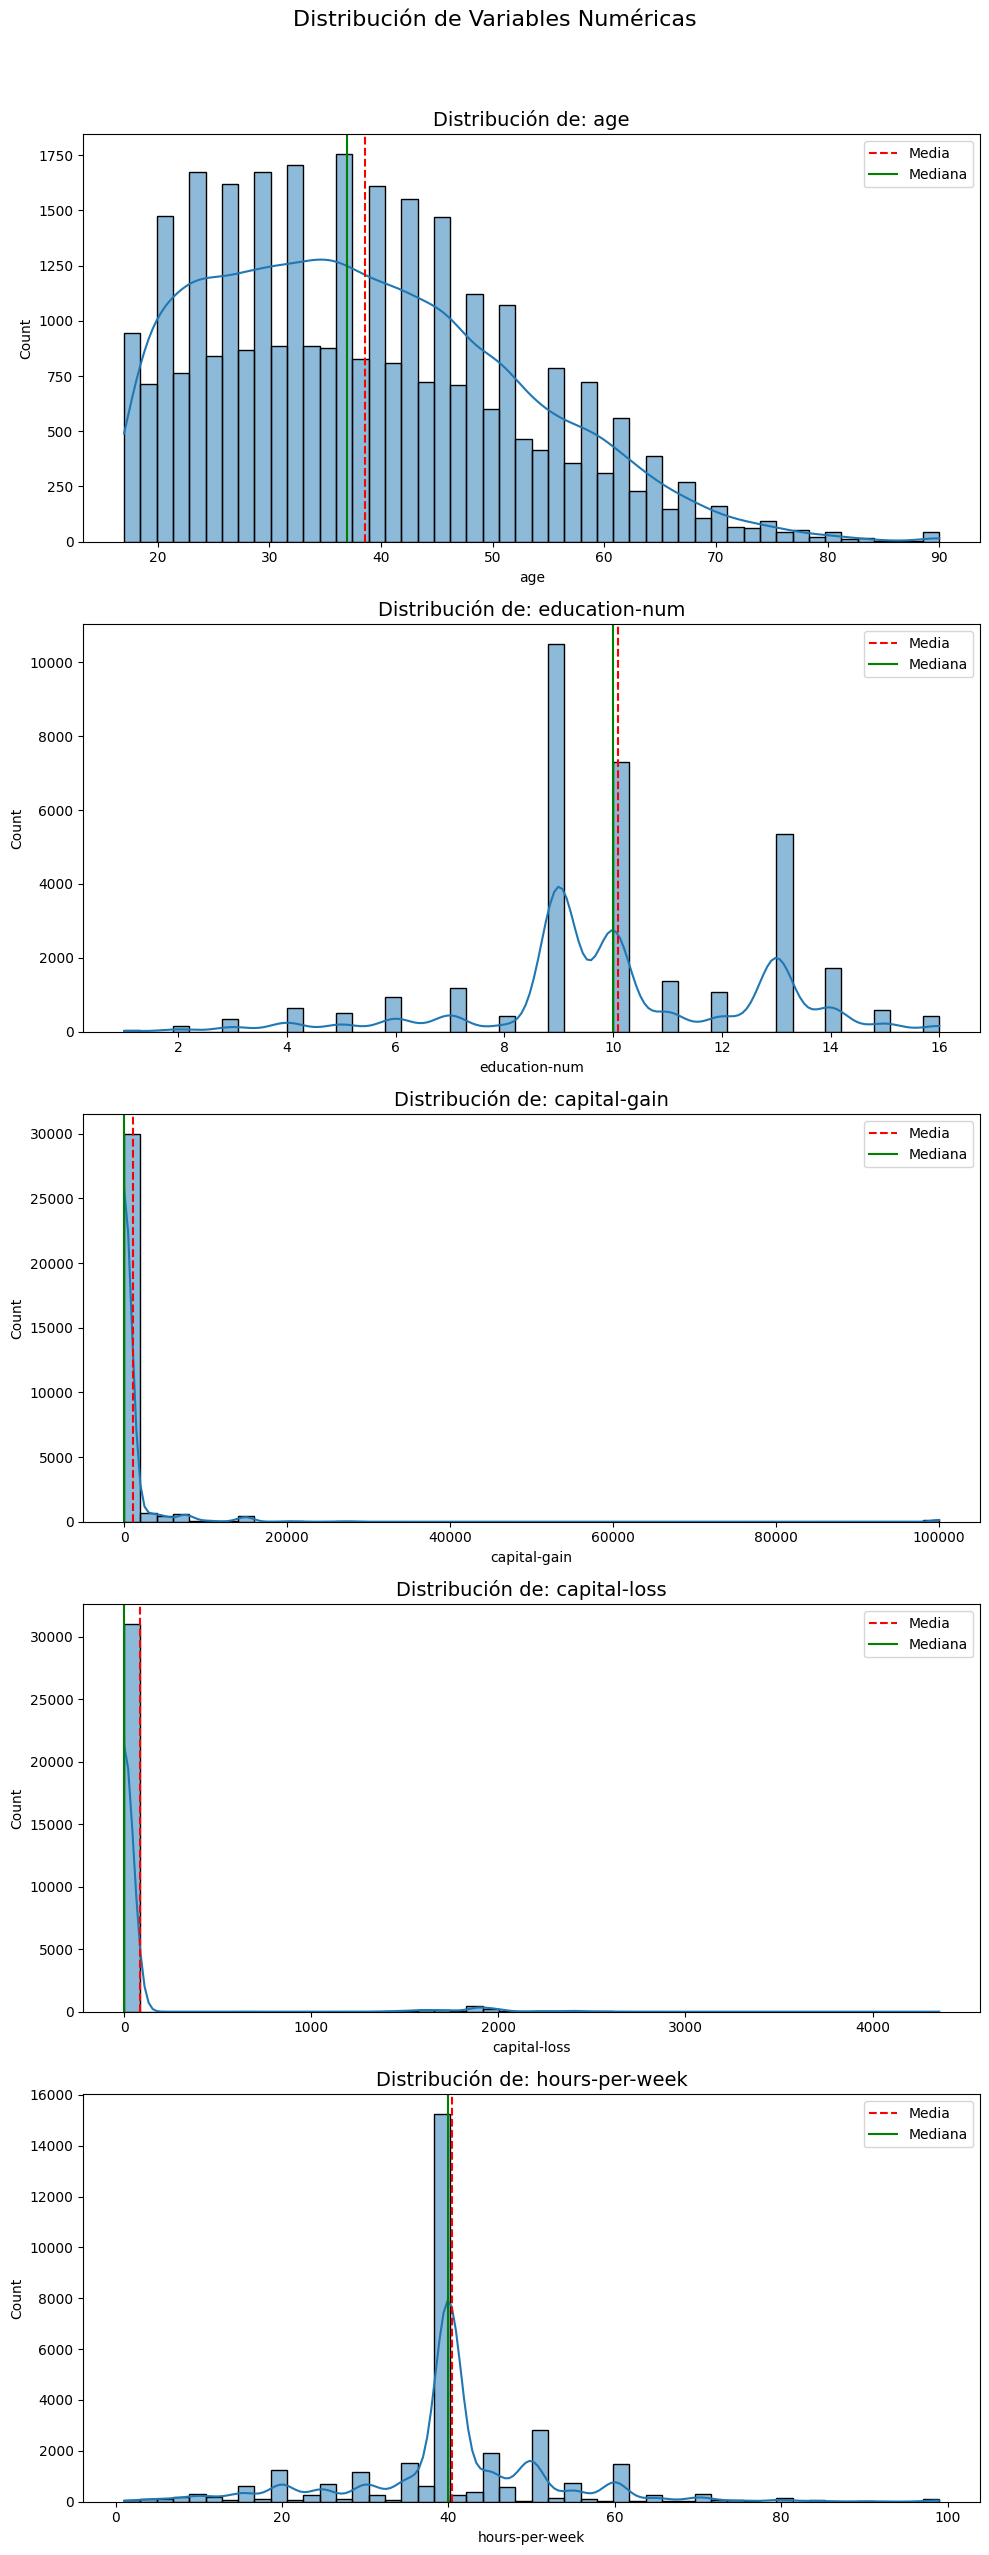

In [18]:
# Estudio de las distribuciones de las variables numéricas antes de la normalización

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numerical_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# 1. Crear figuras para los gráficos de distribución
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 5 * len(numerical_cols)))
fig.suptitle('Distribución de Variables Numéricas', y=1.02, fontsize=16)

for i, col in enumerate(numerical_cols):
    # Histograma y KDE para visualización
    sns.histplot(df_kmeans[col], kde=True, ax=axes[i], bins=50)
    axes[i].set_title(f'Distribución de: {col}', fontsize=14)
    axes[i].axvline(df_kmeans[col].mean(), color='red', linestyle='--', label='Media')
    axes[i].axvline(df_kmeans[col].median(), color='green', linestyle='-', label='Mediana')
    axes[i].legend()

plt.tight_layout()
plt.savefig('distribucion_variables_numericas.png')

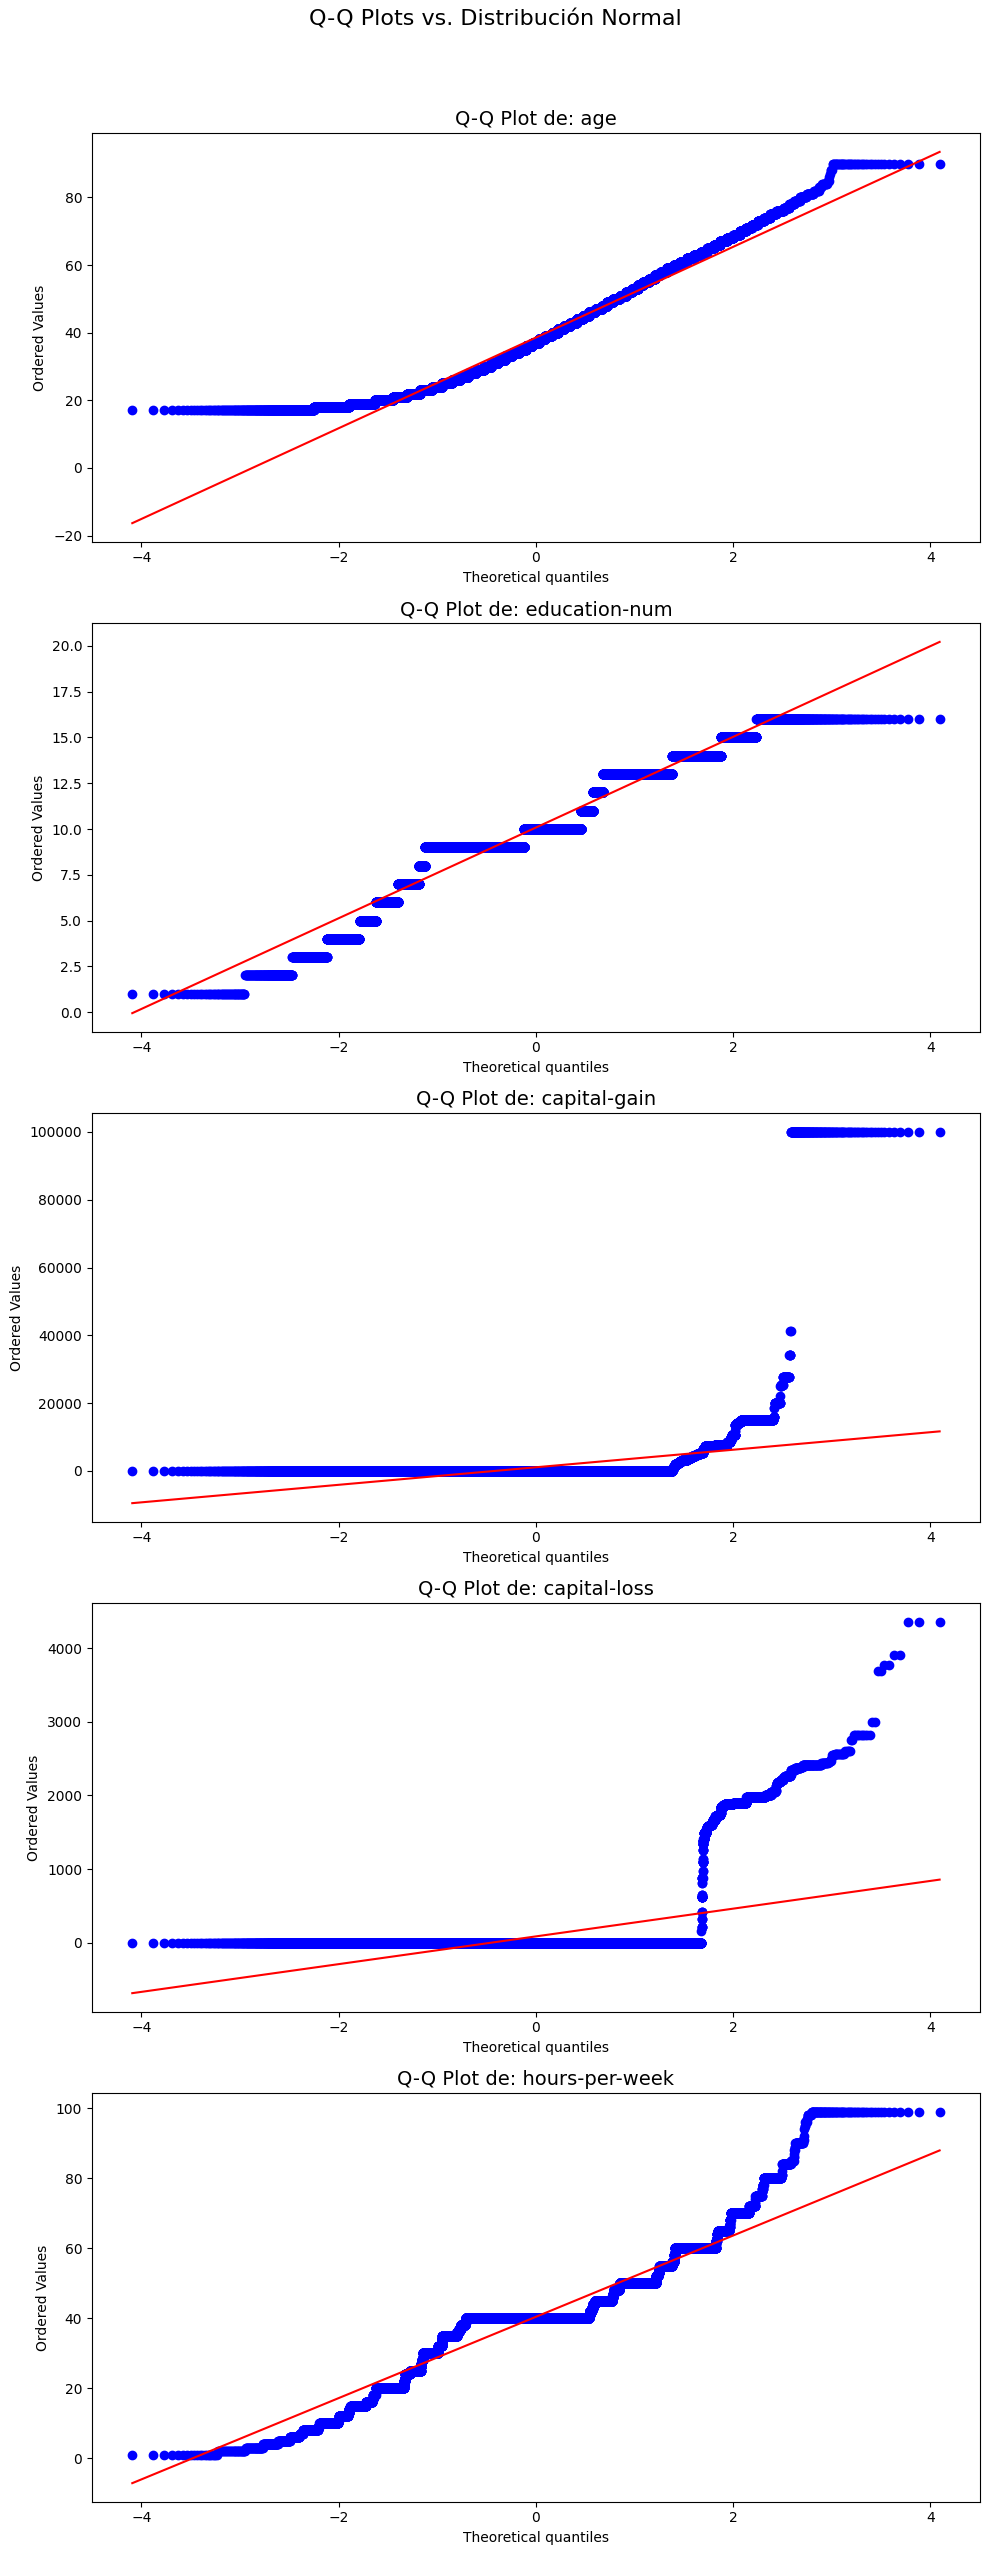

In [ ]:
from scipy import stats

# Script para Gráfico Q-Q (Quantile-Quantile Plot)
# El gráfico Q-Q es la herramienta visual más efectiva para evaluar la normalidad. 
# Si los puntos de datos caen a lo largo de la línea recta de 45 grados, la distribución es normal.

# 2. Crear figuras para los gráficos Q-Q
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 5 * len(numerical_cols)))
fig.suptitle('Q-Q Plots vs. Distribución Normal', y=1.02, fontsize=16)

for i, col in enumerate(numerical_cols):
    stats.probplot(df_kmeans[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot de: {col}', fontsize=14)

plt.tight_layout()
plt.savefig('qq_plots_normalidad.png')

In [20]:
# Script para Prueba de Shapiro-Wilk
# La prueba de Shapiro-Wilk es una de las pruebas de normalidad más potentes
# adecuada para tamaños de muestra moderados.
# - Hipótesis Nula (H_0): La muestra proviene de una población distribuida normalmente.
# - Decisión: Si el p-valor es menor que a=0.05, se rechaza H_0
# por lo que los datos NO son normales.

# 3. Prueba de Normalidad de Shapiro-Wilk
print("\n--- Resultados de la Prueba de Normalidad de Shapiro-Wilk (alpha=0.05) ---")

normality_results = {}
for col in numerical_cols:
    stat, p_value = stats.shapiro(df_kmeans[col])
    
    es_normal = p_value > 0.05
    decision = "NO es normal (Rechazar H0)" if not es_normal else "Puede ser normal (No rechazar H0)"
    
    normality_results[col] = {'Statistic': stat, 'P-Value': p_value, 'Decision': decision}
    print(f"[{col}]: P-Value = {p_value:.6f}. Conclusión: {decision}")

# Convertir el diccionario a DataFrame para una mejor presentación
normality_df = pd.DataFrame.from_dict(normality_results, orient='index')
print("\nResumen Estadístico:")
print(normality_df)


--- Resultados de la Prueba de Normalidad de Shapiro-Wilk (alpha=0.05) ---
[age]: P-Value = 0.000000. Conclusión: NO es normal (Rechazar H0)
[education-num]: P-Value = 0.000000. Conclusión: NO es normal (Rechazar H0)
[capital-gain]: P-Value = 0.000000. Conclusión: NO es normal (Rechazar H0)
[capital-loss]: P-Value = 0.000000. Conclusión: NO es normal (Rechazar H0)
[hours-per-week]: P-Value = 0.000000. Conclusión: NO es normal (Rechazar H0)

Resumen Estadístico:
                Statistic        P-Value                    Decision
age              0.966769   2.703534e-63  NO es normal (Rechazar H0)
education-num    0.926543   2.912449e-80  NO es normal (Rechazar H0)
capital-gain     0.122713  1.248080e-146  NO es normal (Rechazar H0)
capital-loss     0.218308  4.279406e-143  NO es normal (Rechazar H0)
hours-per-week   0.885072   9.528654e-91  NO es normal (Rechazar H0)


/home/oscar/dev/sistemas-inteligentes/general/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32561.
  res = hypotest_fun_out(*samples, **kwds)


In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Estandarizando los valores numéricos con MinMaxScaler
# Se excluye fnlwgt ya que no representa a un individuo en sí
# Sino a cuanta población representa ese registro
# Este valor puede introducir un sesgo si las distancias son muy grandes

# 1. Definir las columnas numéricas que usará K-Means
numerical_cols_k_means = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Crear el DataFrame de trabajo para K-Means
df_kmeans = df[numerical_cols_k_means].copy()

# 2. Inicializar el escalador
scaler = MinMaxScaler()

# 3. Aplicar fit_transform para normalizar los datos
# Esto transforma los datos en un array de numpy
df_kmeans_scaled_array = scaler.fit_transform(df_kmeans)

# 4. Crear el nuevo DataFrame normalizado (dfKMeans)
# Usamos el array transformado y los nombres de columna originales
dfKMeans = pd.DataFrame(
    df_kmeans_scaled_array,
    columns=numerical_cols_k_means
)

# 5. Mostrar las primeras filas del nuevo DataFrame normalizado
print("\nPrimeras 5 filas del DataFrame Normalizado (dfKMeans):")
print(dfKMeans.head())

# 6. Mostrar la descripción para verificar que los valores están entre 0 y 1
print("\nEstadísticas descriptivas (Verificación de la Normalización):")
print(dfKMeans.describe())



Primeras 5 filas del DataFrame Normalizado (dfKMeans):
        age  education-num  capital-gain  capital-loss  hours-per-week
0  0.301370       0.800000       0.02174           0.0        0.397959
1  0.452055       0.800000       0.00000           0.0        0.122449
2  0.287671       0.533333       0.00000           0.0        0.397959
3  0.493151       0.400000       0.00000           0.0        0.397959
4  0.150685       0.800000       0.00000           0.0        0.397959

Estadísticas descriptivas (Verificación de la Normalización):
                age  education-num  capital-gain  capital-loss  hours-per-week
count  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000
mean       0.295639       0.605379      0.010777      0.020042        0.402423
std        0.186855       0.171515      0.073854      0.092507        0.125994
min        0.000000       0.000000      0.000000      0.000000        0.000000
25%        0.150685       0.533333      0.000000      0.0000

## Implementación de Distancia de Gower

In [25]:
import numpy as np
import pandas as pd

def distancia_gower(df):
    num_filas, num_columnas = df.shape
    
    # Obtener mínimo, máximo y rango de las columnas numéricas
    minimos = df.select_dtypes(include=[np.number]).min()
    maximos = df.select_dtypes(include=[np.number]).max()
    rangos = maximos - minimos

    # Inicializar matriz de distancias con ceros
    matriz_gower = np.zeros((num_filas, num_filas))

    # Calcular distancia par a par
    for i in range(num_filas):
        for j in range(i, num_filas):
            suma_distancias = 0
            suma_pesos = 0

            for columna in df.columns:
                valor_i = df.iloc[i][columna]
                valor_j = df.iloc[j][columna]

                # Si hay valores faltantes, se ignoran en el cálculo
                if pd.isnull(valor_i) or pd.isnull(valor_j):
                    continue

                # Si la columna es numérica
                if np.issubdtype(df[columna].dtype, np.number):
                    if rangos[columna] == 0:
                        distancia_parcial = 0
                    else:
                        distancia_parcial = abs(valor_i - valor_j) / rangos[columna]
                    suma_distancias += distancia_parcial
                    suma_pesos += 1
                else:
                    # Si la columna es categórica
                    distancia_parcial = 0 if valor_i == valor_j else 1
                    suma_distancias += distancia_parcial
                    suma_pesos += 1

            # Calcular distancia promedio si hay variables comparables
            if suma_pesos > 0:
                matriz_gower[i, j] = suma_distancias / suma_pesos
                matriz_gower[j, i] = matriz_gower[i, j]  # simetría

    return matriz_gower

In [12]:
import pandas as pd
import numpy as np

def distancia_gower_optimizada(df):
    """
    Calcula la matriz de distancias de Gower para un DataFrame de datos mixtos.
    Optimizado al calcular solo la triangular superior (i < j).
    """
    
    num_filas = df.shape[0]
    
    # 1. Pre-cálculo y Optimización de Búsqueda
    
    # Identificar columnas una sola vez, fuera del bucle
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(exclude=[np.number]).columns

    # Calcular rangos para normalización numérica
    minimos = df[num_cols].min()
    maximos = df[num_cols].max()
    rangos = maximos - minimos

    # Evitar la división por cero si una columna numérica tiene un rango de 0
    rangos[rangos == 0] = 1.0 

    # Inicializar matriz de distancias con ceros. D[i,i] = 0 queda por defecto.
    matriz_gower = np.zeros((num_filas, num_filas))

    # 2. Cálculo de la Matriz (Triangular Superior Estricta)
    
    # Bucle externo: i (filas)
    for i in range(num_filas):
        # Bucle interno: j (columnas)
        # Se inicia en i + 1 para saltar la diagonal (i = j)
        for j in range(i + 1, num_filas): 
            
            suma_distancias = 0
            suma_pesos = 0 # (Denominador de la fórmula de Gower)

            # Contribución de variables numéricas
            for col in num_cols:
                valor_i = df.iloc[i][col]
                valor_j = df.iloc[j][col]

                # Normalización (Min-Max)
                # El rango != 0 ya está asegurado por la línea 19
                distancia_parcial = abs(valor_i - valor_j) / rangos[col]
                suma_distancias += distancia_parcial
                suma_pesos += 1

            # Contribución de variables categóricas (Disimilitud Binaria)
            for col in cat_cols:
                valor_i = df.iloc[i][col]
                valor_j = df.iloc[j][col]
                
                # 0 si son iguales, 1 si son diferentes
                distancia_parcial = 0 if valor_i == valor_j else 1
                suma_distancias += distancia_parcial
                suma_pesos += 1

            # 3. Almacenamiento y Simetría

            if suma_pesos > 0:
                gower_dist = suma_distancias / suma_pesos
                matriz_gower[i, j] = gower_dist # Triangular superior
                matriz_gower[j, i] = gower_dist # Simetría (Triangular inferior)

    return matriz_gower

## Preparación de DataFrame para Gower

In [13]:
import pandas as pd
import numpy as np

# 1. Definición de las columnas para Gower
num_cols_gower = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_cols_gower = [
    'workclass', 'marital-status', 'occupation', 
    'relationship', 'race', 'sex', 'native-country'
]
gower_cols = num_cols_gower + cat_cols_gower

# 2. Creación del DataFrame base
df_gower_base = df[gower_cols].copy()

print("DataFrame base para Gower creado. Forma:", df_gower_base.shape)
print("Tipos de datos (debe haber números y categorías/objetos):\n", df_gower_base.dtypes)

DataFrame base para Gower creado. Forma: (32561, 12)
Tipos de datos (debe haber números y categorías/objetos):
 age                int64
education-num      int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
workclass         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
dtype: object


## Cálculo con muestra pequeña de 5 filas

In [42]:
def crearMatrizGower(df: pd.DataFrame, round: int):
    # Aplicar la función de Gower a la muestra
    matriz_gower = distancia_gower_optimizada(df)
    # Convertir a DataFrame para mejor visualización de la matriz
    df_matriz_gower = pd.DataFrame(
        matriz_gower,
        index=df.index,
        columns=df.index
    )
    return df_matriz_gower.round(round)

# Muestra pequeña aleatoria para validación (5 filas)
muestra_gower_5 = df.sample(n=5, random_state=42)

print("\nDataFrame de muestra de 5 filas para validación:")
print(muestra_gower_5)

print("\nMatriz de Distancias de Gower (5x5):")
print(crearMatrizGower(muestra_gower_5, 42))


DataFrame de muestra de 5 filas para validación:
       age         workclass  fnlwgt     education  education-num  \
14160   27           Private  160178  Some-college             10   
27048   45         State-gov   50567       HS-grad              9   
28868   29           Private  185908     Bachelors             13   
5667    30           Private  190040     Bachelors             13   
7827    29  Self-emp-not-inc  189346  Some-college             10   

           marital-status         occupation   relationship   race     sex  \
14160            Divorced       Adm-clerical  Not-in-family  White  Female   
27048  Married-civ-spouse    Exec-managerial           Wife  White  Female   
28868  Married-civ-spouse    Exec-managerial        Husband  Black    Male   
5667        Never-married  Machine-op-inspct  Not-in-family  White  Female   
7827             Divorced       Craft-repair  Not-in-family  White    Male   

       capital-gain  capital-loss  hours-per-week native-country i

## Cálculo con muestras pequeñas de 100 filas

In [45]:
def muestrear(n: int, random_state: int):
    return df.sample(n=n, random_state=random_state)


# Random State
rs = 42
muestra = df.sample(n=50, random_state=rs)
print(f"Matriz de Distancias de Gower ({muestra.shape[0]}x{muestra.shape[0]}):\n")
print(crearMatrizGower(muestra, rs))


Matriz de Distancias de Gower (50x50):

          14160     27048     28868     5667      7827      15382     4641   \
14160  0.000000  0.381312  0.513035  0.227854  0.224915  0.472348  0.561049   
27048  0.381312  0.000000  0.483967  0.396316  0.462514  0.453937  0.326816   
28868  0.513035  0.483967  0.000000  0.422302  0.492152  0.255955  0.289554   
5667   0.227854  0.396316  0.422302  0.000000  0.366419  0.454019  0.576053   
7827   0.224915  0.462514  0.492152  0.366419  0.000000  0.467836  0.412104   
15382  0.472348  0.453937  0.255955  0.454019  0.467836  0.000000  0.266479   
4641   0.561049  0.326816  0.289554  0.576053  0.412104  0.266479  0.000000   
8943   0.216323  0.377335  0.523916  0.238734  0.435796  0.546149  0.557072   
216    0.199983  0.398075  0.538875  0.249907  0.338548  0.454544  0.565467   
5121   0.452896  0.344900  0.288883  0.467900  0.397828  0.179842  0.181916   
345    0.388227  0.457924  0.443900  0.227040  0.254683  0.443518  0.432219   
31900  0.238

## Probando con muestras de 5000 y 10000 registros

In [14]:
import time
import pandas as pd
import numpy as np
import sys 
# Asumimos que df_gower_base y distancia_gower_optimizada ya están definidos y cargados.

def crearMatrizGower(df: pd.DataFrame, round: int):
    # Aplicar la función de Gower a la muestra
    matriz_gower = distancia_gower_optimizada(df)
    # Convertir a DataFrame para mejor visualización de la matriz
    df_matriz_gower = pd.DataFrame(
        matriz_gower,
        index=df.index,
        columns=df.index
    )
    return df_matriz_gower.round(round), matriz_gower # Devolvemos la matriz NumPy también

# --- Fase 3: Medición de Escalabilidad ---

muestra_sizes = [5000, 10000]
results = {}

# Aseguramos que el DataFrame se baraje y resetee para tomar muestras secuenciales limpias
df_gower_base_shuffled = df_gower_base.sample(frac=1, random_state=42).reset_index(drop=True)

for size in muestra_sizes:
    print(f"\n--- Procesando Muestra de {size} Registros ---")
    
    # 1. Tomar muestra
    muestra = df_gower_base_shuffled.head(size).copy()
    
    # 2. Medir Tiempo de Ejecución
    start_time = time.time()
    matriz_gower_df, matriz_gower_np = crearMatrizGower(muestra, round=4)
    end_time = time.time()
    
    time_taken = end_time - start_time
    
    # 3. Estimar Uso de Memoria (Tamaño del objeto array en RAM)
    # size * itemsize da el total de bytes que ocupa el array de NumPy
    mem_bytes = matriz_gower_np.size * matriz_gower_np.itemsize
    mem_gb = mem_bytes / (1024**3) # Convertir a Gigabytes
    
    # 4. Almacenar y mostrar resultados
    results[size] = {
        'Tiempo (seg)': time_taken, 
        'Memoria (GB)': mem_gb, 
        'Forma Matriz': matriz_gower_np.shape
    }
    
    print(f"Tiempo de Ejecución: {time_taken:.2f} segundos")
    print(f"Memoria Estimada (Matriz): {mem_gb:.3f} GB")

print("\n--- Resultados Comparativos (Fase 3) ---")
results_df = pd.DataFrame(results).T
print(results_df.to_markdown())


--- Procesando Muestra de 5000 Registros ---
Tiempo de Ejecución: 8230.02 segundos
Memoria Estimada (Matriz): 0.186 GB

--- Procesando Muestra de 10000 Registros ---


KeyboardInterrupt: 

In [22]:
# Distancia de gower paralelizada
import pandas as pd
import numpy as np
from multiprocessing import Pool, cpu_count

# Función auxiliar que calcula un subconjunto de filas de la matriz de Gower
# Función auxiliar corregida (recibe estadísticas)
def calcular_segmento_gower(args):
    """Calcula las distancias de Gower para un rango de filas (start_row a end_row) 
       del DataFrame global (df_gower_global), usando estadísticas precalculadas."""
    
    # Desempaquetar argumentos
    df_gower_global, start_row, end_row, num_cols, cat_cols, rangos = args
    num_filas = len(df_gower_global)
    
    segmento_matriz = np.zeros((num_filas, num_filas)) 

    # Bucle principal: Solo calcula las filas asignadas (i) y sus distancias con j
    for i in range(start_row, end_row):
        for j in range(i + 1, num_filas): 
            suma_distancias = 0
            suma_pesos = 0

            # Contribución de variables numéricas
            for col in num_cols:
                valor_i = df_gower_global.iloc[i][col] 
                valor_j = df_gower_global.iloc[j][col]

                # Normalización (Min-Max)
                distancia_parcial = abs(valor_i - valor_j) / rangos[col]
                suma_distancias += distancia_parcial
                suma_pesos += 1

            # Contribución de variables categóricas (Disimilitud Binaria)
            for col in cat_cols:
                valor_i = df_gower_global.iloc[i][col]
                valor_j = df_gower_global.iloc[j][col]
                
                distancia_parcial = 0 if valor_i == valor_j else 1
                suma_distancias += distancia_parcial
                suma_pesos += 1

            if suma_pesos > 0:
                gower_dist = suma_distancias / suma_pesos
                segmento_matriz[i, j] = gower_dist

    return segmento_matriz

def distancia_gower_paralelizada(df):
    """
    Calcula la matriz de distancias de Gower utilizando Multiprocessing.
    """
    num_filas = len(df)
    n_cores = cpu_count()
    
    # --- 1. PRE-CÁLCULO Y DEFINICIÓN (Hecho SOLO una vez) ---
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(exclude=[np.number]).columns 
    
    minimos = df[num_cols].min()
    maximos = df[num_cols].max()
    rangos = maximos - minimos
    rangos[rangos == 0] = 1.0 
    
    # --- 2. CONFIGURACIÓN DE PROCESOS ---
    chunk_size = num_filas // n_cores
    
    # Definir los rangos de las filas y AÑADIR las estadísticas precalculadas
    rangos_de_filas = []
    for k in range(n_cores):
        start = k * chunk_size
        end = (k + 1) * chunk_size if k < n_cores - 1 else num_filas
        
        # La tupla ahora incluye: (df, inicio, fin, num_cols, cat_cols, rangos)
        rangos_de_filas.append((df, start, end, num_cols, cat_cols, rangos))

    # --- 3. EJECUCIÓN Y ENSAMBLAJE ---
    matriz_final = np.zeros((num_filas, num_filas))
    print(f"Iniciando cálculo en {n_cores} núcleos...")
    
    with Pool(processes=n_cores) as pool:
        resultados_segmentos = pool.map(calcular_segmento_gower, rangos_de_filas)
    
    for segmento in resultados_segmentos:
        matriz_final += segmento 

    matriz_final += matriz_final.T 
    
    return matriz_final

In [29]:
import numpy as np
import pandas as pd

# 1. Tomar una muestra de 5 filas
muestra = df_gower_base.sample(5000, random_state=42)
print("\nDataFrame de muestra de 5000 filas para validación:")
print(muestra)

# 2. Aplicar la función de Gower a la muestra
matriz_gower = distancia_gower_paralelizada(muestra)

# 3. Convertir a DataFrame para mejor visualización de la matriz
matriz_gower = pd.DataFrame(
    matriz_gower,
    index=muestra.index,
    columns=muestra.index
)
# 4. Se ajusta la cantidad de números después de la coma
matriz_gower = matriz_gower.round(4)

print("\nMatriz de Distancias de Gower (5000x5000):")
print(matriz_gower)


DataFrame de muestra de 5 filas para validación:
       age  education-num  capital-gain  capital-loss  hours-per-week  \
14160   27             10             0             0              38   
27048   45              9             0             0              40   
28868   29             13             0             0              55   
5667    30             13             0             0              40   
7827    29             10          2202             0              50   
...    ...            ...           ...           ...             ...   
27453   32              9             0             0              48   
27161   43              9             0             0              40   
17926   35              9             0             0              40   
25713   32             11             0             0              99   
3334    26              9             0             0              40   

              workclass      marital-status         occupation   relation

In [28]:
import numpy as np
import pandas as pd

# 1. Tomar una muestra de 5 filas
muestra = df_gower_base.sample(200, random_state=42)
print("\nDataFrame de muestra de 5 filas para validación:")
print(muestra)

# 2. Aplicar la función de Gower a la muestra
matriz_gower = distancia_gower(muestra)

# 3. Convertir a DataFrame para mejor visualización de la matriz
matriz_gower = pd.DataFrame(
    matriz_gower,
    index=muestra.index,
    columns=muestra.index
)
# 4. Se ajusta la cantidad de números después de la coma
matriz_gower = matriz_gower.round(4)

print("\nMatriz de Distancias de Gower (5x5):")
print(matriz_gower)


DataFrame de muestra de 5 filas para validación:
       age  education-num  capital-gain  capital-loss  hours-per-week  \
14160   27             10             0             0              38   
27048   45              9             0             0              40   
28868   29             13             0             0              55   
5667    30             13             0             0              40   
7827    29             10          2202             0              50   
...    ...            ...           ...           ...             ...   
23208   24              9             0             0              50   
32543   45             12             0             0              48   
32513   46             14             0             0              22   
31264   28             10             0             0              40   
1684    20              9             0             0              80   

              workclass      marital-status         occupation   relation

In [31]:
import time
import pandas as pd
import numpy as np
import sys 

def crearMatrizGower(df: pd.DataFrame, round: int):
    # Aplicar la función de Gower a la muestra
    matriz_gower = distancia_gower_paralelizada(df)
    # Convertir a DataFrame para mejor visualización de la matriz
    df_matriz_gower = pd.DataFrame(
        matriz_gower,
        index=df.index,
        columns=df.index
    )
    return df_matriz_gower.round(round), matriz_gower # Devolvemos la matriz NumPy también

# --- Fase 3: Medición de Escalabilidad ---

size = 10000

# Aseguramos que el DataFrame se baraje y resetee para tomar muestras secuenciales limpias
df_gower_base_shuffled = df_gower_base.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n--- Procesando Muestra de {size} Registros ---")

# 1. Tomar muestra
muestra = df_gower_base_shuffled.head(size).copy()

# 2. Medir Tiempo de Ejecución
start_time = time.time()
matriz_gower_df, matriz_gower_np = crearMatrizGower(muestra, round=4)
end_time = time.time()

time_taken = end_time - start_time

# 3. Estimar Uso de Memoria (Tamaño del objeto array en RAM)
# size * itemsize da el total de bytes que ocupa el array de NumPy
mem_bytes = matriz_gower_np.size * matriz_gower_np.itemsize
mem_gb = mem_bytes / (1024**3) # Convertir a Gigabytes

# 4. Almacenar y mostrar resultados
results[size] = {
    'Tiempo (seg)': time_taken, 
    'Memoria (GB)': mem_gb, 
    'Forma Matriz': matriz_gower_np.shape
}

print(f"Tiempo de Ejecución: {time_taken:.2f} segundos")
print(f"Memoria Estimada (Matriz): {mem_gb:.3f} GB")

print("\n--- Resultados Comparativos (Fase 3) ---")
results_df = pd.DataFrame(results).T
print(results_df.to_markdown())


--- Procesando Muestra de 10000 Registros ---
Iniciando cálculo en 8 núcleos...
Tiempo de Ejecución: 9691.63 segundos
Memoria Estimada (Matriz): 0.745 GB

--- Resultados Comparativos (Fase 3) ---


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.